In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
df = pd.read_csv("T2_F_mtcars.csv")

In [12]:
df.head()
df["mpg"] = pd.cut(df["mpg"],[8,16,24,32,50])

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


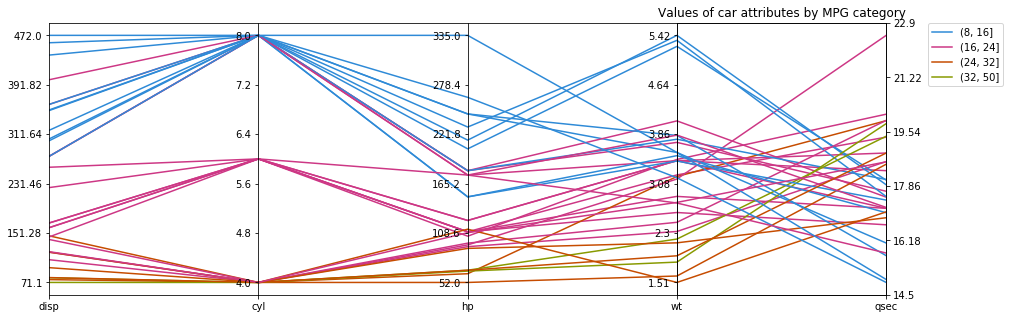

In [13]:
from matplotlib import ticker

cols = ['disp', 'cyl', 'hp', 'wt', 'qsec']
x = [i for i, _ in enumerate(cols)]
colours = ['#2e8ad7', '#cd3785', '#c64c00', '#889a00']
colours = {df['mpg'].cat.categories[i]: colours[i] for i, _ in enumerate(df['mpg'].cat.categories)}
fig, axes = plt.subplots(1, len(x)-1, sharey=False, figsize=(15,5))
min_max_range = {}
for col in cols:
    min_max_range[col] = [df[col].min(), df[col].max(), np.ptp(df[col])]
    df[col] = np.true_divide(df[col] - df[col].min(), np.ptp(df[col]))
for i, ax in enumerate(axes):
    for idx in df.index:
        mpg_category = df.loc[idx, 'mpg']
        ax.plot(x, df.loc[idx, cols], colours[mpg_category])
    ax.set_xlim([x[i], x[i+1]])
def set_ticks_for_axis(dim, ax, ticks):
    min_val, max_val, val_range = min_max_range[cols[dim]]
    step = val_range / float(ticks-1)
    tick_labels = [round(min_val + step * i, 2) for i in range(ticks)]
    norm_min = df[cols[dim]].min()
    norm_range = np.ptp(df[cols[dim]])
    norm_step = norm_range / float(ticks-1)
    ticks = [round(norm_min + norm_step * i, 2) for i in range(ticks)]
    ax.yaxis.set_ticks(ticks)
    ax.set_yticklabels(tick_labels)

for dim, ax in enumerate(axes):
    ax.xaxis.set_major_locator(ticker.FixedLocator([dim]))
    set_ticks_for_axis(dim, ax, ticks=6)
    ax.set_xticklabels([cols[dim]])
    
ax = plt.twinx(axes[-1])
dim = len(axes)
ax.xaxis.set_major_locator(ticker.FixedLocator([x[-2], x[-1]]))
set_ticks_for_axis(dim, ax, ticks=6)
ax.set_xticklabels([cols[-2], cols[-1]])

plt.subplots_adjust(wspace=0)


plt.legend(
    [plt.Line2D((0,1),(0,0), color=colours[cat]) for cat in df['mpg'].cat.categories],
    df['mpg'].cat.categories,
    bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)

plt.title("Values of car attributes by MPG category")

plt.show()